In [10]:
!pip3 install -U gensim
!pip3 install pyLDAvis

You should consider upgrading via the 'c:\users\kdw27\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135599 sha256=37006c3aa0a7be6b80491d7bbe0851a827f179605ee181fddb0897beeea777a5
  Sto

You should consider upgrading via the 'c:\users\kdw27\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [1]:
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pickle
import csv
import pandas as pd
from eunjeon import Mecab

100%|████████████████████████████████████████████████████████████████████████████| 964/964 [00:00<00:00, 324061.00it/s]
2021-11-02 02:23:32,232 : INFO : using symmetric alpha at 0.5
2021-11-02 02:23:32,232 : INFO : using symmetric eta at 0.5
2021-11-02 02:23:32,234 : INFO : using serial LDA version on this node
2021-11-02 02:23:32,235 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 964 documents, updating model once every 964 documents, evaluating perplexity every 964 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-02 02:23:32,236 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


Number of unique tokens: 133
Number of documents: 964


2021-11-02 02:23:32,608 : INFO : -5.489 per-word bound, 44.9 perplexity estimate based on a held-out corpus of 964 documents with 2697 words
2021-11-02 02:23:32,609 : INFO : PROGRESS: pass 0, at document #964/964
2021-11-02 02:23:32,919 : INFO : topic #0 (0.500): 0.029*"문재인" + 0.026*"부작용" + 0.024*"하루" + 0.022*"중국" + 0.021*"세계" + 0.020*"안녕" + 0.019*"재앙" + 0.018*"내년" + 0.018*"마스크" + 0.018*"사망"
2021-11-02 02:23:32,920 : INFO : topic #1 (0.500): 0.026*"바이러스" + 0.024*"독감" + 0.022*"영국" + 0.020*"화이" + 0.018*"안전" + 0.018*"모더" + 0.017*"집단" + 0.017*"내년" + 0.016*"확진" + 0.015*"문제"
2021-11-02 02:23:32,921 : INFO : topic diff=0.479509, rho=1.000000
2021-11-02 02:23:32,922 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=133, num_topics=2, decay=0.5, chunksize=2000) in 0.69s', 'datetime': '2021-11-02T02:23:32.922438', 'gensim': '4.1.2', 'python': '3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 

2021-11-02 02:23:56,829 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2021-11-02 02:24:05,727 : INFO : 3 accumulators retrieved from output queue
2021-11-02 02:24:05,739 : INFO : accumulated word occurrence stats for 695 virtual documents
2021-11-02 02:24:06,411 : INFO : using symmetric alpha at 0.038461538461538464
2021-11-02 02:24:06,411 : INFO : using symmetric eta at 0.038461538461538464
2021-11-02 02:24:06,412 : INFO : using serial LDA version on this node
2021-11-02 02:24:06,414 : INFO : running online (single-pass) LDA training, 26 topics, 1 passes over the supplied corpus of 964 documents, updating model once every 964 documents, evaluating perplexity every 964 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-02 02:24:06,415 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-11-02 02:24:06,6

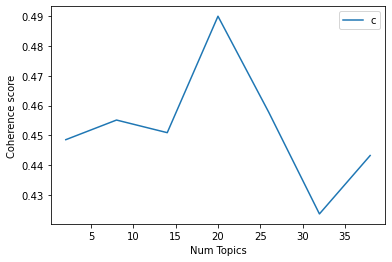

In [2]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values=[]
    model_list=[]
    for num_topics in range(start,limit,step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,texts=texts, dictionary=dictionary,coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list,coherence_values

def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit=40 #40 ,2,6
    start=2
    step=6
    
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
if __name__ == '__main__':
    # Prepare a Tokenized Noun File for input
    # This is for Setting up t
    processed_data = [sent.strip().split(",") for sent in tqdm(open('./초기/백신_초기_964개_tokenize.csv', 'r', encoding='utf-8-sig').readlines())]
    dictionary = corpora.Dictionary(processed_data)
    dictionary.filter_extremes(no_below=10, no_above=0.05)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    find_optimal_number_of_topics(dictionary, corpus, processed_data)



In [4]:
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')
lda_model = LdaModel(corpus, id2word=dictionary,iterations=400, num_topics=20, passes=30, callbacks=[coherence_logger, perplexity_logger]) # Set number of Topics and number of Sampling

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topics)

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)


coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)

pickle.dump(corpus, open('./초기/lda_corpus_백신초기.pkl', 'wb')) # Save gensim and corpus file
dictionary.save('./초기/lda_dictionary_백신초기.gensim')
lda_model.save('./초기/lda_model_백신초기.gensim')

lda_visualization = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, './초기/백신초기.html') # Visualization of the Result

2021-11-02 02:26:20,621 : INFO : using symmetric alpha at 0.05
2021-11-02 02:26:20,622 : INFO : using symmetric eta at 0.05
2021-11-02 02:26:20,622 : INFO : using serial LDA version on this node
2021-11-02 02:26:20,624 : INFO : running online (multi-pass) LDA training, 20 topics, 30 passes over the supplied corpus of 964 documents, updating model once every 964 documents, evaluating perplexity every 964 documents, iterating 400x with a convergence threshold of 0.001000
2021-11-02 02:26:20,868 : INFO : -7.965 per-word bound, 249.9 perplexity estimate based on a held-out corpus of 964 documents with 2697 words
2021-11-02 02:26:20,869 : INFO : PROGRESS: pass 0, at document #964/964
2021-11-02 02:26:21,038 : INFO : topic #11 (0.050): 0.108*"정치" + 0.068*"모더" + 0.054*"상황" + 0.054*"아스트라" + 0.041*"전문" + 0.041*"시작" + 0.041*"정책" + 0.041*"마스크" + 0.041*"안녕" + 0.027*"준비"
2021-11-02 02:26:21,039 : INFO : topic #3 (0.050): 0.048*"문재인" + 0.039*"언론" + 0.034*"체포" + 0.029*"화이" + 0.029*"연합" + 0.029*"아스트라"

2021-11-02 02:26:24,000 : INFO : topic diff=0.491480, rho=0.377964
2021-11-02 02:26:24,011 : INFO : Epoch 5: Coherence estimate: -9.34014913272786
2021-11-02 02:26:24,231 : INFO : Epoch 5: Perplexity estimate: 32.90606461687115
2021-11-02 02:26:24,420 : INFO : -5.040 per-word bound, 32.9 perplexity estimate based on a held-out corpus of 964 documents with 2697 words
2021-11-02 02:26:24,421 : INFO : PROGRESS: pass 6, at document #964/964
2021-11-02 02:26:24,546 : INFO : topic #11 (0.050): 0.207*"상황" + 0.134*"전문" + 0.124*"정치" + 0.112*"모더" + 0.051*"정책" + 0.045*"질병" + 0.041*"시작" + 0.034*"필요" + 0.032*"방법" + 0.019*"일본"
2021-11-02 02:26:24,555 : INFO : topic #8 (0.050): 0.107*"재앙" + 0.089*"하루" + 0.071*"행복" + 0.054*"일상" + 0.052*"경제" + 0.049*"미래" + 0.048*"법치" + 0.048*"정의" + 0.045*"터널" + 0.045*"암흑"
2021-11-02 02:26:24,564 : INFO : topic #9 (0.050): 0.185*"바이러스" + 0.075*"집단" + 0.062*"면역" + 0.061*"이야기" + 0.061*"신종" + 0.060*"변종" + 0.059*"감염" + 0.052*"감염증" + 0.048*"모더" + 0.041*"물량"
2021-11-02 02:26:

2021-11-02 02:26:27,617 : INFO : Epoch 11: Perplexity estimate: 29.162363474110204
2021-11-02 02:26:27,797 : INFO : -4.867 per-word bound, 29.2 perplexity estimate based on a held-out corpus of 964 documents with 2697 words
2021-11-02 02:26:27,797 : INFO : PROGRESS: pass 12, at document #964/964
2021-11-02 02:26:27,909 : INFO : topic #8 (0.050): 0.108*"재앙" + 0.084*"하루" + 0.072*"행복" + 0.057*"일상" + 0.053*"경제" + 0.050*"미래" + 0.048*"법치" + 0.048*"정의" + 0.046*"암흑" + 0.046*"터널"
2021-11-02 02:26:27,910 : INFO : topic #0 (0.050): 0.310*"내년" + 0.218*"대통령" + 0.087*"얼마" + 0.076*"경제" + 0.055*"조치" + 0.028*"희망" + 0.027*"방법" + 0.026*"대한민국" + 0.024*"문재인" + 0.021*"국내"
2021-11-02 02:26:27,911 : INFO : topic #11 (0.050): 0.248*"상황" + 0.144*"전문" + 0.141*"정치" + 0.120*"모더" + 0.065*"질병" + 0.053*"정책" + 0.036*"시작" + 0.034*"방법" + 0.019*"일본" + 0.017*"승인"
2021-11-02 02:26:27,911 : INFO : topic #1 (0.050): 0.169*"이상" + 0.118*"임상" + 0.117*"실험" + 0.094*"건강" + 0.085*"스레드" + 0.078*"주사" + 0.046*"부작용" + 0.034*"국내" + 0.02

2021-11-02 02:26:30,651 : INFO : PROGRESS: pass 18, at document #964/964
2021-11-02 02:26:30,759 : INFO : topic #15 (0.050): 0.187*"문제" + 0.179*"새해" + 0.149*"준비" + 0.124*"치료" + 0.119*"보급" + 0.043*"확인" + 0.034*"마스크" + 0.030*"필요" + 0.020*"안정" + 0.020*"검증"
2021-11-02 02:26:30,760 : INFO : topic #7 (0.050): 0.194*"시간" + 0.175*"사망" + 0.156*"화이" + 0.072*"회사" + 0.071*"확인" + 0.069*"이유" + 0.049*"당국" + 0.034*"현지" + 0.034*"부작용" + 0.033*"바이오"
2021-11-02 02:26:30,761 : INFO : topic #10 (0.050): 0.172*"아스트라" + 0.141*"영국" + 0.110*"구매" + 0.098*"승인" + 0.050*"화이" + 0.047*"관련" + 0.037*"현지" + 0.035*"사용" + 0.031*"당국" + 0.026*"효능"
2021-11-02 02:26:30,762 : INFO : topic #8 (0.050): 0.108*"재앙" + 0.083*"하루" + 0.072*"행복" + 0.057*"일상" + 0.053*"경제" + 0.050*"미래" + 0.048*"법치" + 0.048*"정의" + 0.046*"안보" + 0.046*"암흑"
2021-11-02 02:26:30,763 : INFO : topic #3 (0.050): 0.260*"문재인" + 0.108*"쓰레기" + 0.100*"정권" + 0.088*"언론" + 0.067*"효과" + 0.042*"통제" + 0.040*"연합" + 0.040*"이번" + 0.034*"기사" + 0.029*"이유"
2021-11-02 02:26:30,765

2021-11-02 02:26:33,567 : INFO : topic #14 (0.050): 0.605*"안전" + 0.164*"조심" + 0.038*"확진" + 0.029*"검증" + 0.025*"상황" + 0.016*"관련" + 0.015*"영국" + 0.014*"필요" + 0.007*"하루" + 0.001*"우라"
2021-11-02 02:26:33,568 : INFO : topic #10 (0.050): 0.173*"아스트라" + 0.143*"영국" + 0.112*"구매" + 0.104*"승인" + 0.052*"화이" + 0.038*"사용" + 0.037*"현지" + 0.035*"관련" + 0.032*"당국" + 0.026*"효능"
2021-11-02 02:26:33,569 : INFO : topic #13 (0.050): 0.373*"독감" + 0.097*"연구" + 0.073*"올해" + 0.063*"제약사" + 0.039*"화이" + 0.037*"효과" + 0.034*"모더" + 0.034*"위험" + 0.033*"계약" + 0.025*"공급"
2021-11-02 02:26:33,570 : INFO : topic #6 (0.050): 0.305*"안녕" + 0.094*"마스크" + 0.087*"정도" + 0.075*"구입" + 0.068*"책임" + 0.068*"보도" + 0.060*"희망" + 0.060*"언론" + 0.026*"국내" + 0.026*"관심"
2021-11-02 02:26:33,571 : INFO : topic diff=0.050291, rho=0.196116
2021-11-02 02:26:33,582 : INFO : Epoch 24: Coherence estimate: -9.651958436701012
2021-11-02 02:26:33,747 : INFO : Epoch 24: Perplexity estimate: 27.75743803177484
2021-11-02 02:26:33,913 : INFO : -4.794 per-wo

2021-11-02 02:26:36,076 : INFO : topic #1 (0.050): 0.179*"이상" + 0.134*"임상" + 0.123*"실험" + 0.098*"건강" + 0.087*"스레드"
2021-11-02 02:26:36,077 : INFO : topic #2 (0.050): 0.213*"시작" + 0.125*"최고" + 0.090*"대응" + 0.089*"바이러스" + 0.077*"단계"
2021-11-02 02:26:36,077 : INFO : topic #3 (0.050): 0.279*"문재인" + 0.107*"쓰레기" + 0.099*"정권" + 0.086*"언론" + 0.066*"효과"
2021-11-02 02:26:36,079 : INFO : topic #4 (0.050): 0.223*"세계" + 0.126*"안정" + 0.125*"민주당" + 0.104*"성공" + 0.070*"돌파"
2021-11-02 02:26:36,080 : INFO : topic #5 (0.050): 0.279*"계약" + 0.251*"우라" + 0.139*"제대" + 0.075*"발표" + 0.073*"세상"
2021-11-02 02:26:36,082 : INFO : topic #6 (0.050): 0.300*"안녕" + 0.092*"마스크" + 0.089*"정도" + 0.075*"구입" + 0.072*"책임"
2021-11-02 02:26:36,084 : INFO : topic #7 (0.050): 0.206*"시간" + 0.188*"사망" + 0.157*"화이" + 0.095*"확인" + 0.069*"이유"
2021-11-02 02:26:36,086 : INFO : topic #8 (0.050): 0.108*"재앙" + 0.082*"하루" + 0.072*"행복" + 0.058*"일상" + 0.053*"경제"
2021-11-02 02:26:36,087 : INFO : topic #9 (0.050): 0.195*"바이러스" + 0.094*"집단" + 0.

[(0, '0.337*"내년" + 0.221*"대통령" + 0.090*"얼마" + 0.078*"경제" + 0.063*"조치"'), (1, '0.179*"이상" + 0.134*"임상" + 0.123*"실험" + 0.098*"건강" + 0.087*"스레드"'), (2, '0.213*"시작" + 0.125*"최고" + 0.090*"대응" + 0.089*"바이러스" + 0.077*"단계"'), (3, '0.279*"문재인" + 0.107*"쓰레기" + 0.099*"정권" + 0.086*"언론" + 0.066*"효과"'), (4, '0.223*"세계" + 0.126*"안정" + 0.125*"민주당" + 0.104*"성공" + 0.070*"돌파"'), (5, '0.279*"계약" + 0.251*"우라" + 0.139*"제대" + 0.075*"발표" + 0.073*"세상"'), (6, '0.300*"안녕" + 0.092*"마스크" + 0.089*"정도" + 0.075*"구입" + 0.072*"책임"'), (7, '0.206*"시간" + 0.188*"사망" + 0.157*"화이" + 0.095*"확인" + 0.069*"이유"'), (8, '0.108*"재앙" + 0.082*"하루" + 0.072*"행복" + 0.058*"일상" + 0.053*"경제"'), (9, '0.195*"바이러스" + 0.094*"집단" + 0.084*"면역" + 0.065*"변종" + 0.065*"신종"'), (10, '0.176*"아스트라" + 0.145*"영국" + 0.114*"구매" + 0.107*"승인" + 0.053*"화이"'), (11, '0.295*"상황" + 0.151*"전문" + 0.151*"정치" + 0.115*"모더" + 0.079*"질병"'), (12, '0.366*"부작용" + 0.265*"확진" + 0.144*"하루" + 0.084*"사망" + 0.048*"대한민국"'), (13, '0.382*"독감" + 0.100*"연구" + 0.075*"올해" + 0.065*"제약사" +

BrokenPipeError: [Errno 32] Broken pipe